# Modeling

SmallDS

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, 150+1))[:150]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()


In [43]:
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  print(f'Accuracy score of {algorithm}:\nR2: {R2}\nRMSE: {rmse}\nMAE: {mae}')
  return (R2, rmse, mae)

Read data from Test and Train csv file

In [44]:
data_train = pd.read_csv('train_data_SMALL.csv')
data_test = pd.read_csv('test_data_SMALL.csv')

data_train.head()

,area,room,toilet,lat,long,price-VND,loai_bds-code
0,-0.284205,0.481581,0.605840,0.165417,0.928469,6800000000,14
1,0.242033,-1.286138,-1.199897,1.224666,0.862674,5800000000,7
2,0.077584,0.481581,0.605840,0.989153,-0.240851,8000000000,14
3,-0.317094,-0.107659,0.003928,-0.540378,-0.150931,5600000000,14
4,1.327397,0.481581,0.003928,0.118537,0.763251,8600000000,14


Chia train/validation/test

In [45]:


X = data_train.drop('price-VND', axis=1)
Y = data_train['price-VND']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


x_train


,area,room,toilet,lat,long,loai_bds-code
134,-0.448654,-0.107659,0.003928,0.431066,-0.176518,14
351,-0.152645,-1.286138,-1.199897,-0.843233,0.837452,7
592,-1.534018,-0.107659,-0.597985,1.407346,0.861577,14
320,-0.843332,-0.107659,0.003928,1.030824,0.031466,0
186,-0.481544,-0.107659,0.003928,0.843306,-1.795436,14
...,...,...,...,...,...,...
277,0.899829,-0.107659,0.003928,0.612258,-1.210593,14
9,0.242033,1.070820,1.207753,0.835493,-1.735124,14
359,0.143363,-1.286138,-1.199897,-2.422991,1.757483,7
192,0.505151,-1.286138,-1.199897,0.275174,0.417462,7


In [46]:
x_test

,area,room,toilet,lat,long,loai_bds-code
453,1.787855,1.660060,1.207753,0.539335,-0.249989,14
52,-0.317094,-1.286138,-1.199897,-0.976058,0.831970,7
535,0.998499,-1.286138,-1.199897,-0.560469,0.068019,14
468,-1.270900,-0.107659,0.003928,0.126350,0.167442,0
55,-0.645993,1.070820,1.207753,1.185972,-2.315214,14
...,...,...,...,...,...,...
332,0.077584,-0.107659,0.003928,1.354514,0.051205,0
242,0.011804,-0.107659,1.207753,0.165044,-0.559956,14
514,-1.238010,-1.286138,-1.199897,1.227642,0.569521,7
458,-1.369569,0.481581,0.003928,0.271453,-0.254741,13


# Tạo và lập mô hình bằng Linear Regression

In [47]:
lrg_hyper = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4]
}
lrg_hyper_search = RandomizedSearchCV(lrg_hyper, param_grid, cv=5)
lrg_hyper_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1, 1, 2, 4]})

In [48]:
lrg_hyper_search.best_params_

{'n_jobs': 4, 'fit_intercept': True, 'copy_X': False}

In [49]:
lrg_hyper = lrg_hyper_search.best_estimator_
lrg_hyper.fit(x_train, y_train)

LinearRegression(copy_X=False, n_jobs=4)

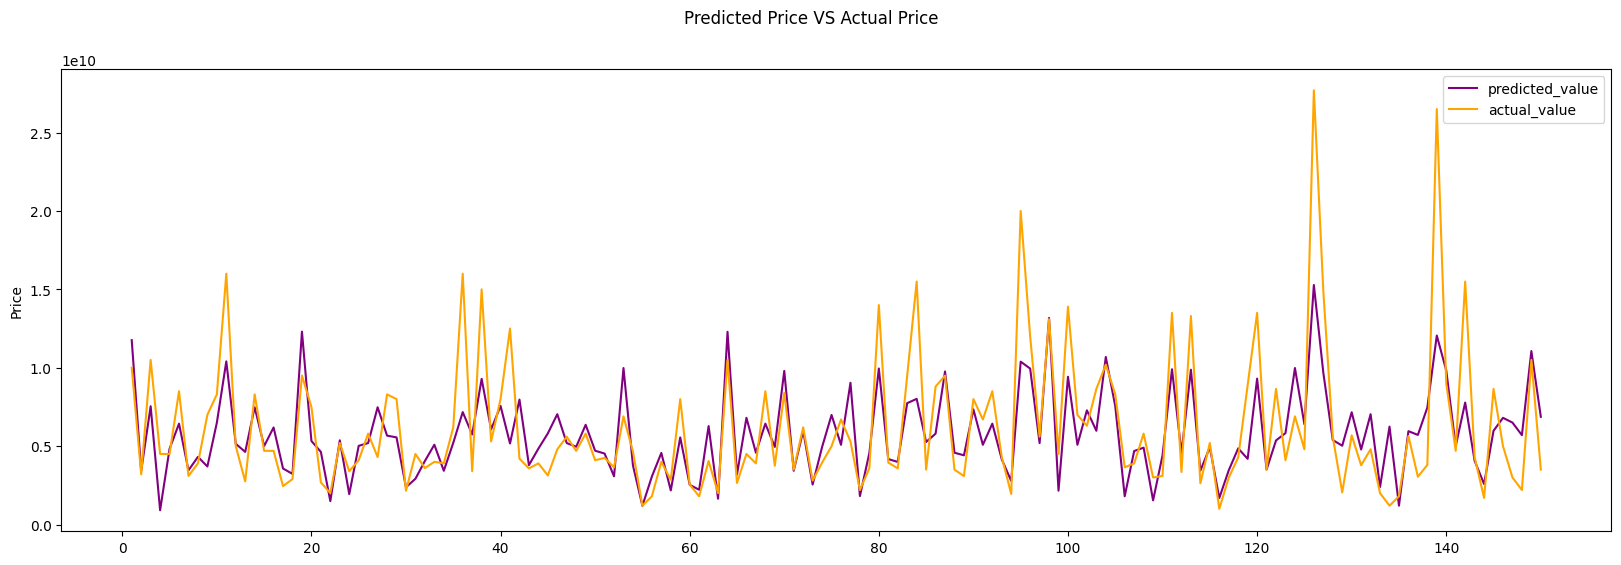

In [50]:
y_pred_linear_hyper = lrg_hyper.predict(x_test)
plot_residuals(y_test, y_pred_linear_hyper)


In [51]:
R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper=accuracy_score(y_test, y_pred_linear_hyper, lrg_hyper)

Accuracy score of LinearRegression(copy_X=False, n_jobs=4):
R2: 0.533368179651624
RMSE: 2941761881.450573
MAE: 1953628976.3352256


# Tạo và lập mô hình bằng Logistic Regression

In [52]:
regression = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
random_cv = RandomizedSearchCV(regression, param_grid, cv=5)
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']})

Bộ siêu tham số tối ưu

In [53]:
random_cv.best_params_


{'penalty': 'l2', 'C': 10}

In [54]:
log_hyper = random_cv.best_estimator_
log_hyper.fit(x_train, y_train)

LogisticRegression(C=10)

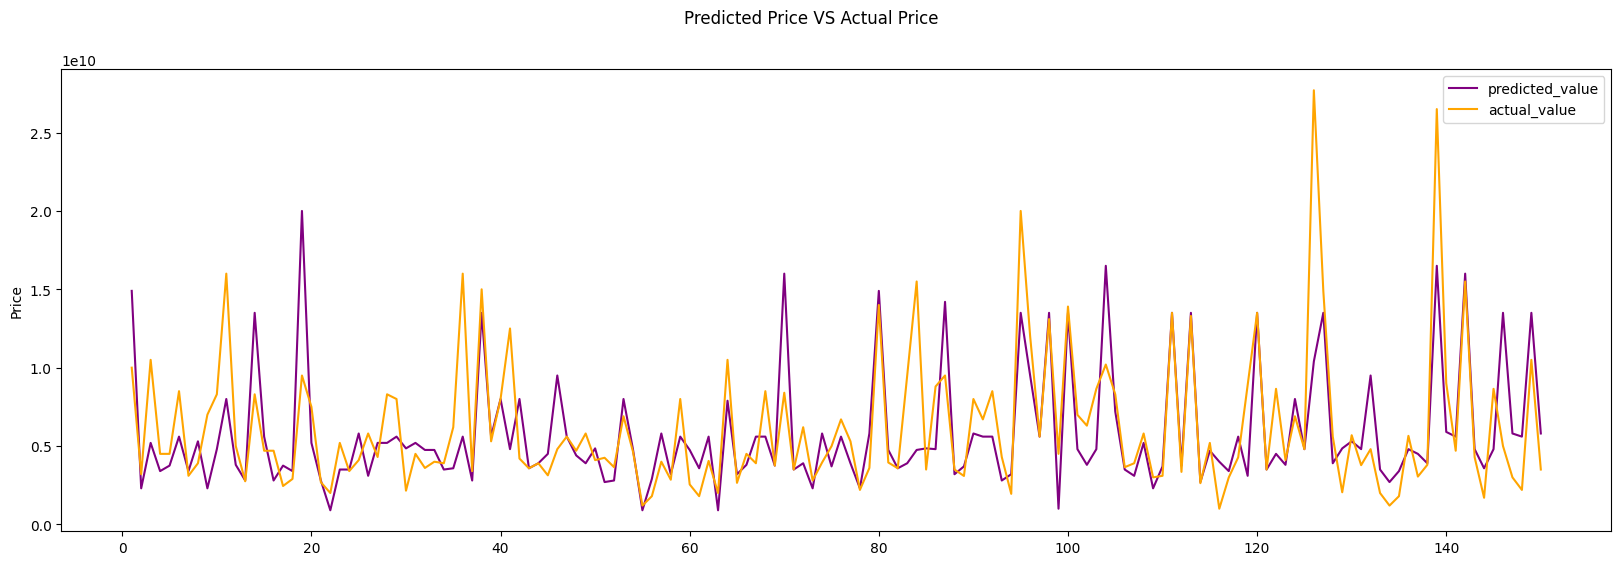

In [55]:
y_pred_log_hyper = log_hyper.predict(x_test)
plot_residuals(y_test, y_pred_log_hyper)

In [56]:
R2_log_hyper, rmse_log_hyper, mae_log_hyper=accuracy_score(y_test, y_pred_log_hyper, log_hyper)

Accuracy score of LogisticRegression(C=10):
R2: 0.9194965958694012
RMSE: 1221876925.3938901
MAE: 2221239130.4347825


So sánh Logistic Regression với Linear Regression với bộ siêu tham số

In [57]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression with Hyper parameter', R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression with Hyper parameter,0.533368,2.941762e+09,1.953629e+09
1,Logistic Regression with Hyper parameter,0.919497,1.221877e+09,2.221239e+09


kiểm tra lại với test data

In [58]:
x_val= data_test.drop('price-VND', axis=1)
y_val= data_test['price-VND']


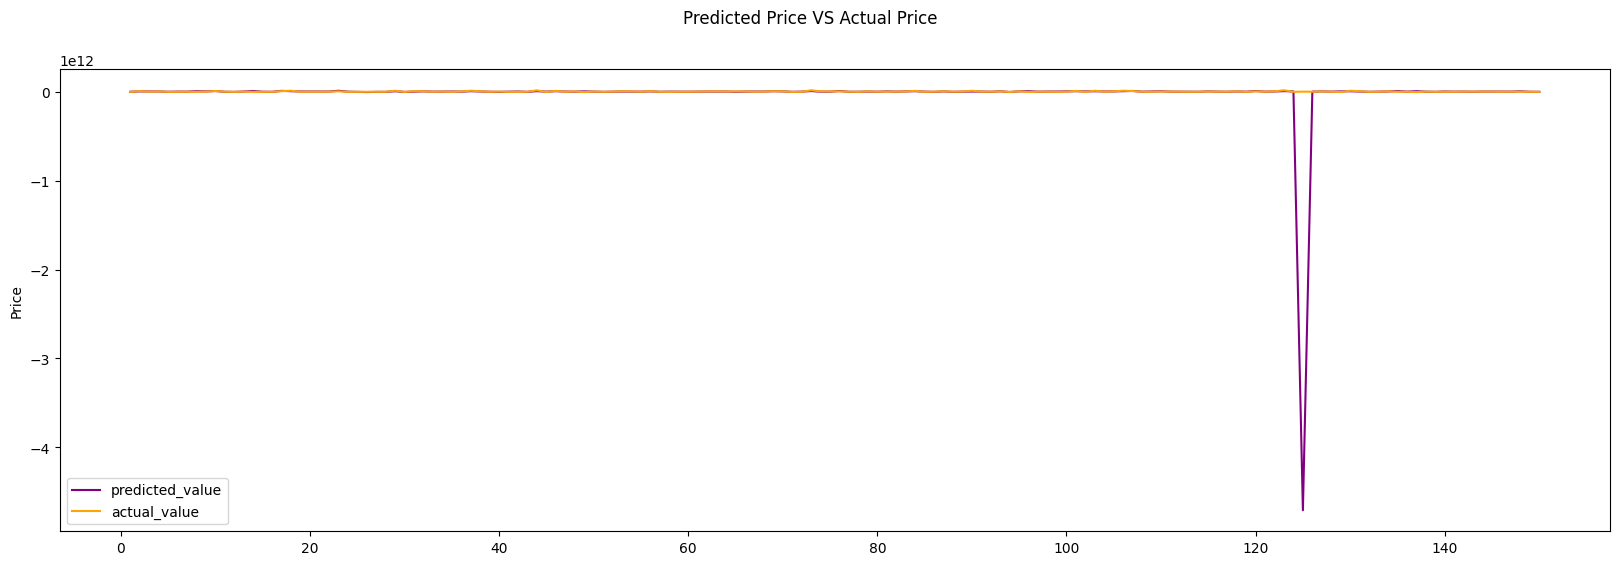

Accuracy score of LinearRegression(copy_X=False, n_jobs=4):
R2: -5435.794873243587
RMSE: 327646624227.46967
MAE: 25077273639.419846


(-5435.794873243587, 327646624227.46967, 25077273639.419846)

In [59]:
y_pred_linear_hyper = lrg_hyper.predict(x_val)
plot_residuals(y_val, y_pred_linear_hyper)
accuracy_score(y_val, y_pred_linear_hyper, lrg_hyper)


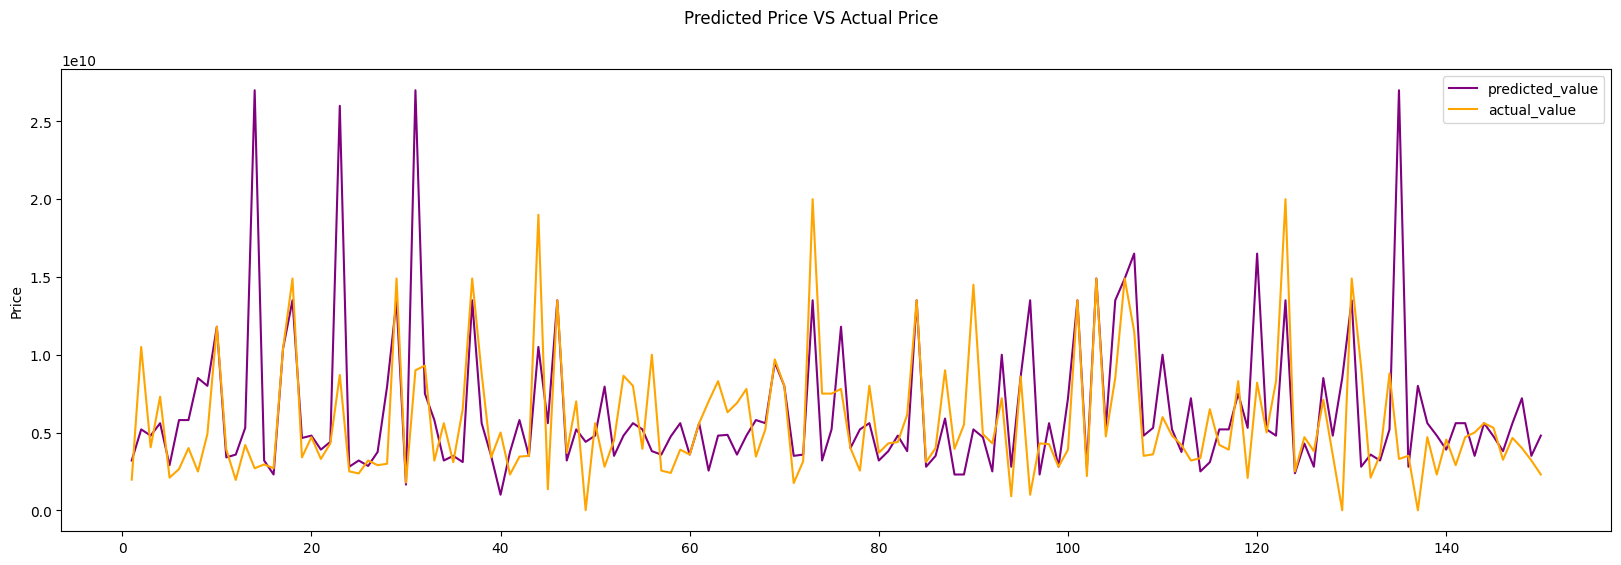

Accuracy score of LogisticRegression(C=10):
R2: 0.9550353045556549
RMSE: 942258474.2829812
MAE: 2625383154.589372


(0.9550353045556549, 942258474.2829812, 2625383154.589372)

In [60]:
y_pred_log_hyper = log_hyper.predict(x_val)
plot_residuals(y_val, y_pred_log_hyper)
accuracy_score(y_val, y_pred_log_hyper, log_hyper)